### <p style="text-align: center;">Community Segmentation</p>
# <p style="text-align: center;">Mall Customer Analysis</p>
#### <p style="text-align: center;">Jeffrey D Nelson and David N Campbell</p>

The purpose of this notebook is to use K-Means clustering to analyze different segments of Mall customers and determine what marketing strategy is best for each segment.

## Data Exploration

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r'data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As we can see, there are four relevant features:
1. Gender: customer gender identity
2. Age: customer age in number of years
3. Annual Income: customer yearly income measured in thousands of dollars
4. Spending Score: score assigned by mall based on behavior and nature of spending

Since the number of features is small, we can avoid performing Principal Component Analysis on this data set. Before we can do K-Means, though, we need to explore the relationships between these features.

### Feature Relationships

Text(0, 0.5, 'Spending Score')

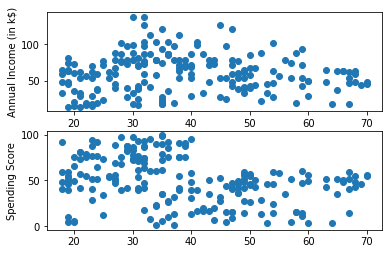

In [21]:
# Age vs others
# num rows, num columns, current index

plt.subplot(211)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (in k$)')

plt.subplot(212)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.ylabel('Spending Score')

Text(0, 0.5, 'Annual Income (k$)')

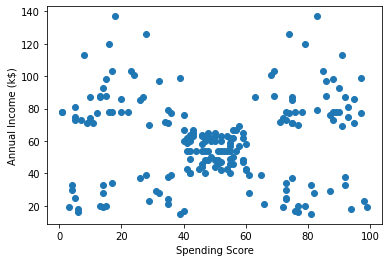

In [24]:
plt.clf()
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

## K-Means

Do k-means using just spending score and annual income.

In [26]:
from sklearn.cluster import KMeans

X = df[['Spending Score (1-100)' , 'Annual Income (k$)']].iloc[: , :].values

# hard-code for now to visualize
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [28]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

Text(0, 0.5, 'Annual Income (k$)')

<Figure size 432x288 with 0 Axes>

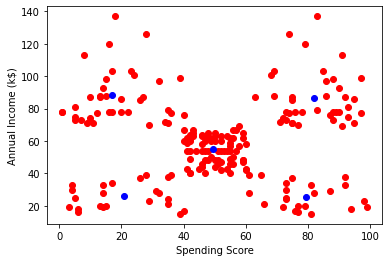

In [32]:
plt.clf()
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color='red')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

No hard-coding, let's get the silhouette score.

In [45]:
silhouette_scores = []
clusters = [ i for i in range(2, 10) ]

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    print("Silhouette score for {num} clusters: {score}".format(num=i, score=score))
    silhouette_scores.append(score)

Silhouette score for 2 clusters: 0.2968969162503008
Silhouette score for 3 clusters: 0.46761358158775435
Silhouette score for 4 clusters: 0.4931963109249047
Silhouette score for 5 clusters: 0.553931997444648
Silhouette score for 6 clusters: 0.5379675585622219
Silhouette score for 7 clusters: 0.5264283703685728
Silhouette score for 8 clusters: 0.4563394686110682
Silhouette score for 9 clusters: 0.4553729779390266


Text(0, 0.5, 'Number of Clusters')

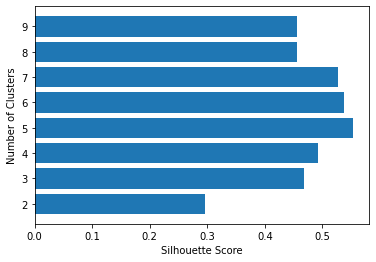

In [50]:
# Plot silhouette score
plt.figure()
plt.barh(clusters, silhouette_scores)
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Clusters')

Clearly five clusters is the best for these attributes.

<Figure size 432x288 with 0 Axes>

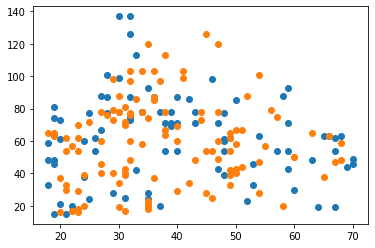

In [52]:
# Plot Gender vs other attributes
plt.clf()
fig = plt.figure()
ax = plt.gca()
for gender in ['Male' , 'Female']:
    ax.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender], label=gender)

In [53]:
X = df[['Spending Score (1-100)' , 'Annual Income (k$)', 'Age']].iloc[: , :].values

silhouette_scores = []
clusters = [ i for i in range(2, 10) ]

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    print("Silhouette score for {num} clusters: {score}".format(num=i, score=score))
    silhouette_scores.append(score)

Silhouette score for 2 clusters: 0.293166070535953
Silhouette score for 3 clusters: 0.3839349967742105
Silhouette score for 4 clusters: 0.40546302077733304
Silhouette score for 5 clusters: 0.44045315045641703
Silhouette score for 6 clusters: 0.4523443947724053
Silhouette score for 7 clusters: 0.44125523526699084
Silhouette score for 8 clusters: 0.42977587111050725
Silhouette score for 9 clusters: 0.411203806978027


Text(0, 0.5, 'Number of Clusters')

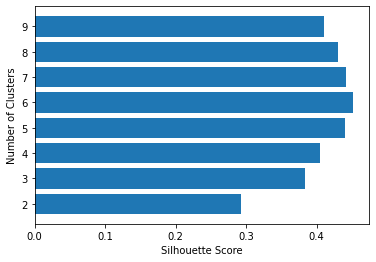

In [54]:
# Plot silhouette score
plt.figure()
plt.barh(clusters, silhouette_scores)
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Clusters')

## Explain what to market to which groups